## DSCI564 Survival Analysis
##### Instructor: Mohammad Reza Rajati, PhD
##### Yutao Ye
##### USCID: 2448443089

---

## Introduction
##### Survival Analysis is a subfield of statistics that studies time to a specific event (such as death or malfunction of an equipment) as a random variable. The statistical properties of the random variable such as mean time to an event are very important in many fields such as biostatistics and reliability engineering.

##### In this project, I will perform survival analysis on benchmark data and learn about statistical tools for survival analysis such as the Kaplan-Meier estimator and the Cox Proportional Hazards Model.

---

#### Section (a): Data Exploration and Pre-processing

In [9]:
library(survival)
head(pbcseq)
str(pbcseq)

,id,futime,status,trt,age,sex,day,ascites,hepato,spiders,edema,bili,chol,albumin,alk.phos,ast,platelet,protime,stage,sex_num
,<int>,<int>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,1,400,2,1,58.76523,f,0,1,1,1,1,14.5,261,2.60,1718,138.0,190,12.2,4,1
2,1,400,2,1,58.76523,f,192,1,1,1,1,21.3,NA,2.94,1612,6.2,183,11.2,4,1
3,2,5169,0,1,56.44627,f,0,0,1,1,0,1.1,302,4.14,7395,113.5,221,10.6,3,1
4,2,5169,0,1,56.44627,f,182,0,1,1,0,0.8,NA,3.60,2107,139.5,188,11.0,3,1
5,2,5169,0,1,56.44627,f,365,0,1,1,0,1.0,NA,3.55,1711,144.2,161,11.6,3,1
6,2,5169,0,1,56.44627,f,768,0,1,1,0,1.9,NA,3.92,1365,144.2,122,10.6,3,1


'data.frame':	1945 obs. of  20 variables:
 $ id      : int  1 1 2 2 2 2 2 2 2 2 ...
 $ futime  : int  400 400 5169 5169 5169 5169 5169 5169 5169 5169 ...
 $ status  : int  2 2 0 0 0 0 0 0 0 0 ...
 $ trt     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ age     : num  58.8 58.8 56.4 56.4 56.4 ...
 $ sex     : Factor w/ 2 levels "m","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ day     : int  0 192 0 182 365 768 1790 2151 2515 2882 ...
 $ ascites : int  1 1 0 0 0 0 1 1 1 1 ...
 $ hepato  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ spiders : int  1 1 1 1 1 1 1 1 1 1 ...
 $ edema   : num  1 1 0 0 0 0 0.5 1 1 1 ...
 $ bili    : num  14.5 21.3 1.1 0.8 1 1.9 2.6 3.6 4.2 3.6 ...
 $ chol    : int  261 NA 302 NA NA NA 230 NA NA 244 ...
 $ albumin : num  2.6 2.94 4.14 3.6 3.55 3.92 3.32 2.92 2.73 2.8 ...
 $ alk.phos: int  1718 1612 7395 2107 1711 1365 1110 996 860 779 ...
 $ ast     : num  138 6.2 113.5 139.5 144.2 ...
 $ platelet: int  190 183 221 188 161 122 135 100 103 113 ...
 $ protime : num  12.2 11.2 10.6 11 11.6 10.6 11.3 1

In [11]:
# Fix the 'sex' variable to match (0=male, 1=female)
# Create 'event_death' for Survival Analysis
pbcseq$sex_num <- as.numeric(pbcseq$sex) - 1
pbcseq$event_death <- ifelse(pbcseq$status == 2, 1, 0)
head(pbcseq)


,id,futime,status,trt,age,sex,day,ascites,hepato,spiders,⋯,bili,chol,albumin,alk.phos,ast,platelet,protime,stage,sex_num,event_death
,<int>,<int>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,1,400,2,1,58.76523,f,0,1,1,1,⋯,14.5,261,2.60,1718,138.0,190,12.2,4,1,1
2,1,400,2,1,58.76523,f,192,1,1,1,⋯,21.3,NA,2.94,1612,6.2,183,11.2,4,1,1
3,2,5169,0,1,56.44627,f,0,0,1,1,⋯,1.1,302,4.14,7395,113.5,221,10.6,3,1,0
4,2,5169,0,1,56.44627,f,182,0,1,1,⋯,0.8,NA,3.60,2107,139.5,188,11.0,3,1,0
5,2,5169,0,1,56.44627,f,365,0,1,1,⋯,1.0,NA,3.55,1711,144.2,161,11.6,3,1,0
6,2,5169,0,1,56.44627,f,768,0,1,1,⋯,1.9,NA,3.92,1365,144.2,122,10.6,3,1,0


---

#### Section (b): Creating the Survival Object

In [13]:
S <- Surv(pbcseq$day, pbcseq$futime, pbcseq$event_death)
head(S, 20)

 [1] (   0, 400]  ( 192, 400]  (   0,5169+] ( 182,5169+] ( 365,5169+]
 [6] ( 768,5169+] (1790,5169+] (2151,5169+] (2515,5169+] (2882,5169+]
[11] (3226,5169+] (   0,1012]  ( 176,1012]  ( 364,1012]  ( 743,1012] 
[16] (   0,1925]  ( 188,1925]  ( 372,1925]  ( 729,1925]  (1254,1925] 

Any entry with a '+' is a patient who was still alive (or transplanted) at the end of that interval.

---

#### Section (c): The Kaplan-Meier Estimator

##### (i) The event of interest is death

In [ ]:
pbcseq$event_death <- ifelse(pbcseq$status == 2, 1, 0)

##### (ii) Kaplan-Meier vs. Empirical Distribution
The Kaplan-Meier estimator $\hat{S}(t)$ estimates the survival function $S(t) = P(T > t)$.
In the case where no censoring exists in the data, the Kaplan-Meier estimator reduces exactly to the complement of the **Empirical Distribution Function (EDF)**.

If $F_X(t)$ is the empirical distribution function (the proportion of observations less than or equal to $t$), then:
$$\hat{S}(t) = 1 - F_X(t)$$
This means the survival curve would simply be a step function dropping by $1/n$ at each observed event time, where n is the number of observations.

##### (iii): Kaplan-Meier Estimator & Plotting

In [15]:
pbcseq$start_yr <- pbcseq$day / 365.25
pbcseq$stop_yr  <- pbcseq$futime / 365.25

S_years <- Surv(pbcseq$start_yr, pbcseq$stop_yr, pbcseq$event_death)
km_sex <- survfit(S_years ~ sex_num, data = pbcseq)
km_drug <- survfit(S_years ~ trt, data = pbcseq)

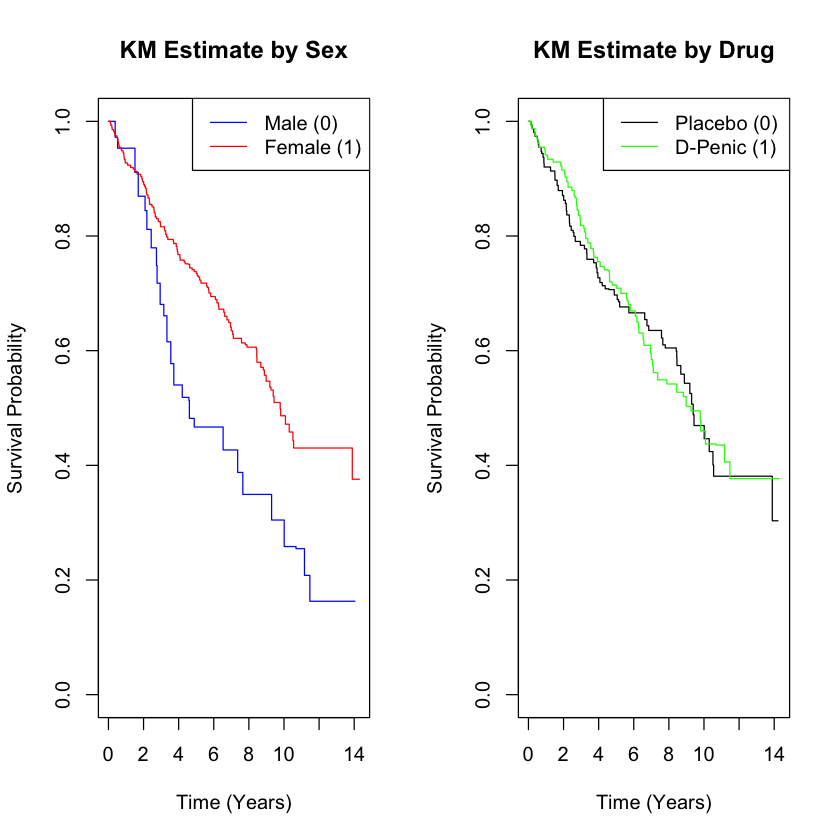

In [19]:
par(mfrow=c(1,2),bg = "white")
plot(km_sex, 
     col = c("blue", "red"), 
     main = "KM Estimate by Sex", 
     xlab = "Time (Years)", ylab = "Survival Probability")
legend("topright", legend=c("Male (0)", "Female (1)"), col=c("blue", "red"), lty=1)

plot(km_drug, 
     col = c("black", "green"), 
     main = "KM Estimate by Drug", 
     xlab = "Time (Years)", ylab = "Survival Probability")
legend("topright", legend=c("Placebo (0)", "D-Penic (1)"), col=c("black", "green"), lty=1)

par(mfrow=c(1,1))

##### (iv): Log-Rank Test

In [22]:
S2 <- Surv(pbcseq$futime, pbcseq$event_death)
print("--- Log-Rank Test Results ---")
diff_sex <- survdiff(S2 ~ sex_num, data = pbcseq)
print(diff_sex)

diff_drug <- survdiff(S2 ~ trt, data = pbcseq)
print(diff_drug)

[1] "--- Log-Rank Test Results ---"
Call:
survdiff(formula = S2 ~ sex_num, data = pbcseq)

             N Observed Expected (O-E)^2/E (O-E)^2/V
sex_num=0  237      147     88.8     38.16      44.2
sex_num=1 1708      578    636.2      5.33      44.2

 Chisq= 44.2  on 1 degrees of freedom, p= 3e-11 
Call:
survdiff(formula = S2 ~ trt, data = pbcseq)

        N Observed Expected (O-E)^2/E (O-E)^2/V
trt=0 967      360      360  0.000348  0.000697
trt=1 978      365      365  0.000343  0.000697

 Chisq= 0  on 1 degrees of freedom, p= 1 


We performed the Log-Rank test ($\alpha = 0.05$) to determine if there are significant differences in survival functions based on Sex and Drug.  
1. Test for Sex Result: $\chi^2 = 44.2$, the p-value ($3e^{-11}$) is significantly less than the significance level of $\alpha = 0.05$.  
Conclusion: We reject the null hypothesis. There is a statistically significant difference in survival times between male and female patients. The data suggests that sex is a strong predictor of survival in this dataset.  
2. Test for Drug Result: $\chi^2 \approx 0$, the p-value ($1$) is greater than the significance level of $\alpha = 0.05$. The Chi-square statistic is effectively zero, indicating almost identical observed and expected event counts for both groups.  
Conclusion: We fail to reject the null hypothesis. There is no significant difference in survival between patients treated with D-penicillamine and those treated with a placebo. The type of drug used does not predict survival in this study.

---

#### Section (d): Cox Proportional Hazards Model

##### (i): Use log of the two covariates alkaline phosphate and platelet

In [23]:
pbcseq$log_alk_phos <- log(pbcseq$alk.phos)
pbcseq$log_platelet <- log(pbcseq$platelet)

##### (ii): Missing value imputation

In [24]:
impute_mean <- function(x) {
  replace(x, is.na(x), mean(x, na.rm = TRUE))
}
impute_mode <- function(x) {
  ux <- unique(x[!is.na(x)])
  mode_val <- ux[which.max(tabulate(match(x, ux)))]
  replace(x, is.na(x), mode_val)
}

In [25]:
pbcseq$bili      <- impute_mean(pbcseq$bili)
pbcseq$albumin   <- impute_mean(pbcseq$albumin)
pbcseq$ast       <- impute_mean(pbcseq$ast)
pbcseq$protime   <- impute_mean(pbcseq$protime)
pbcseq$log_alk_phos <- impute_mean(pbcseq$log_alk_phos)
pbcseq$log_platelet <- impute_mean(pbcseq$log_platelet)
pbcseq$chol      <- impute_mean(pbcseq$chol)

pbcseq$stage   <- impute_mode(pbcseq$stage)
pbcseq$ascites <- impute_mode(pbcseq$ascites)
pbcseq$hepato  <- impute_mode(pbcseq$hepato)
pbcseq$spiders <- impute_mode(pbcseq$spiders)
pbcseq$edema   <- impute_mode(pbcseq$edema)

print(colSums(is.na(pbcseq)))

          id       futime       status          trt          age          sex 
           0            0            0            0            0            0 
         day      ascites       hepato      spiders        edema         bili 
           0            0            0            0            0            0 
        chol      albumin     alk.phos          ast     platelet      protime 
           0            0           60            0           73            0 
       stage      sex_num  event_death     start_yr      stop_yr log_alk_phos 
           0            0            0            0            0            0 
log_platelet 
           0 


##### (iii): Iinitial Cox Proportional Hazards (CPH) model

In [29]:
# 'S2' would incorrectly treat sequential visits as independent subjects starting at t=0.
# Hence we use 'S' for the Cox model.
library(survival)
S <- Surv(pbcseq$day, pbcseq$futime, pbcseq$event_death)
M_initial <- coxph(S ~ trt + bili, data = pbcseq)
summary(M_initial)

Call:
coxph(formula = S ~ trt + bili, data = pbcseq)

  n= 1945, number of events= 725 

          coef exp(coef)  se(coef)      z Pr(>|z|)    
trt  -0.092510  0.911640  0.076026 -1.217    0.224    
bili  0.111401  1.117843  0.004178 26.661   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     exp(coef) exp(-coef) lower .95 upper .95
trt     0.9116     1.0969    0.7854     1.058
bili    1.1178     0.8946    1.1087     1.127

Concordance= 0.765  (se = 0.009 )
Likelihood ratio test= 416.3  on 2 df,   p=<2e-16
Wald test            = 724  on 2 df,   p=<2e-16
Score (logrank) test = 994.5  on 2 df,   p=<2e-16


##### (iv): Stepwise Variable Selection

In [30]:
full_formula <- ~ trt + bili + age + sex_num + ascites + hepato + spiders + edema + albumin + ast + protime + log_alk_phos + log_platelet + stage
M_f <- step(M_initial, 
            scope = list(lower = ~ trt + bili, upper = full_formula), 
            direction = "both",
            trace = 0)

print("--- Final Selected Model (Best Fit) ---")
summary(M_f)

[1] "--- Final Selected Model (Best Fit) ---"


Call:
coxph(formula = S ~ trt + bili + albumin + age + protime + log_alk_phos + 
    edema + sex_num + stage + log_platelet + ascites + ast, data = pbcseq)

  n= 1945, number of events= 725 

                   coef  exp(coef)   se(coef)       z Pr(>|z|)    
trt          -0.1457926  0.8643370  0.0778423  -1.873 0.061079 .  
bili          0.0957820  1.1005191  0.0062845  15.241  < 2e-16 ***
albumin      -0.8535209  0.4259127  0.0845743 -10.092  < 2e-16 ***
age           0.0433042  1.0442555  0.0044329   9.769  < 2e-16 ***
protime       0.1274667  1.1359471  0.0176259   7.232 4.77e-13 ***
log_alk_phos  0.4774609  1.6119762  0.0626982   7.615 2.63e-14 ***
edema         0.8139255  2.2567496  0.1275579   6.381 1.76e-10 ***
sex_num      -0.5325609  0.5870996  0.1013591  -5.254 1.49e-07 ***
stage         0.1874923  1.2062209  0.0562726   3.332 0.000863 ***
log_platelet -0.2670856  0.7656076  0.0908764  -2.939 0.003293 ** 
ascites      -0.3106900  0.7329410  0.1223628  -2.539 0.011114 *  
ast 

##### (v): Does the type of drug used predict survival?
No, the drug does not significantly predict survival. In final model (M_f), the p-value for the variable trt is 0.061.Since $0.061 > 0.05$, the result is not statistically significant at the 95% confidence level. This means that after adjusting for other factors (like bilirubin, age, etc.), there is no strong evidence that D-penicillamine improves survival compared to the placebo.

##### (vi): P-values and Overall Significance

**Covariate Significance Table**

| Covariate | P-value | Significance Level |
| :--- | :--- | :--- |
| **bili** | $< 2e^{-16}$ | Highly Significant ($p < 0.001$) |
| **albumin** | $< 2e^{-16}$ | Highly Significant ($p < 0.001$) |
| **age** | $< 2e^{-16}$ | Highly Significant ($p < 0.001$) |
| **protime** | $4.77e^{-13}$ | Highly Significant ($p < 0.001$) |
| **log_alk_phos** | $2.63e^{-14}$ | Highly Significant ($p < 0.001$) |
| **edema** | $1.76e^{-10}$ | Highly Significant ($p < 0.001$) |
| **sex_num** | $1.49e^{-07}$ | Highly Significant ($p < 0.001$) |
| **stage** | $0.00086$ | Highly Significant ($p < 0.001$) |
| **log_platelet** | $0.0033$ | Significant ($p < 0.05$) |
| **ascites** | $0.0111$ | Significant ($p < 0.05$) |
| **ast** | $0.0338$ | Significant ($p < 0.05$) |
| **trt** (Drug) | $0.0611$ | Not Significant ($p > 0.05$) |

**Overall Model Significance**
* **Likelihood Ratio Test:** $1081$ on $12$ degrees of freedom
* **Overall P-value:** $< 2e^{-16}$
* **Conclusion:** The p-value is essentially zero, indicating the overall model is highly effective at predicting survival.

##### (vii): Study the effect of the sex of the patients on their survival

In [31]:
M_with_sex <- M_f
M_no_sex <- update(M_with_sex, . ~ . - sex_num)
aic_with <- AIC(M_with_sex)
aic_no   <- AIC(M_no_sex)
print(paste("AIC (With Sex):", round(aic_with, 2)))
print(paste("AIC (Without Sex):", round(aic_no, 2)))
diff <- aic_no - aic_with
print(paste("Difference (No Sex - With Sex):", round(diff, 2)))
if(aic_with < aic_no) {
  print("Conclusion: The model WITH sex has a lower AIC, meaning it is the better model.")
} else {
  print("Conclusion: The model WITHOUT sex has a lower AIC, meaning sex does not improve the model.")
}

[1] "AIC (With Sex): 8558.31"
[1] "AIC (Without Sex): 8581.73"
[1] "Difference (No Sex - With Sex): 23.43"
[1] "Conclusion: The model WITH sex has a lower AIC, meaning it is the better model."


##### (viii): Plot Survival Curves

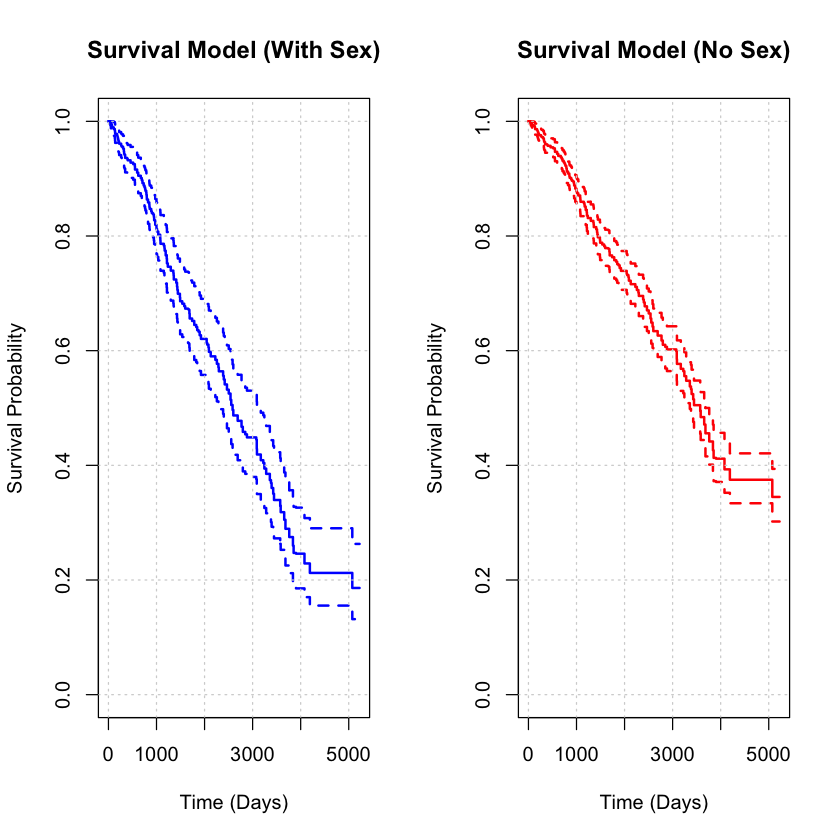

In [33]:
fit_with <- survfit(M_with_sex)
fit_no   <- survfit(M_no_sex)
par(mfrow=c(1,2), bg="white")
# Plot 1: Model WITH Sex
plot(fit_with, 
     col = "blue", 
     lwd = 2,
     main = "Survival Model (With Sex)", 
     xlab = "Time (Days)", 
     ylab = "Survival Probability")
# Add a simple grid for readability
grid()

# Plot 2: Model WITHOUT Sex
plot(fit_no, 
     col = "red", 
     lwd = 2,
     main = "Survival Model (No Sex)", 
     xlab = "Time (Days)", 
     ylab = "Survival Probability")
grid()

---

#### Deep Survival Models with DeepSurv

##### (i): Setup

In [35]:
if (!require("survivalmodels")) install.packages("survivalmodels")
if (!require("reticulate")) install.packages("reticulate")

library(survivalmodels)
library(reticulate)

install_pycox(method = "virtualenv", pip = TRUE)
print("Setup Complete.")

Loading required package: survivalmodels

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘survivalmodels’”
also installing the dependency ‘Rcpp’





The downloaded binary packages are in
	/var/folders/yb/c7x92pl93wdbf3d50bygq_zc0000gn/T//RtmpobOIgd/downloaded_packages


Loading required package: reticulate

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reticulate’”
also installing the dependencies ‘rprojroot’, ‘RcppTOML’, ‘here’, ‘png’, ‘rappdirs’, ‘withr’


Warning message in download.file(urls, destfiles, "libcurl", mode = "wb", ...):
“URL 'https://cran.r-project.org/bin/macosx/big-sur-arm64/contrib/4.5/rprojroot_2.1.1.tgz': Timeout of 60 seconds was reached”
Warning message in download.file(urls, destfiles, "libcurl", mode = "wb", ...):
“some files were not downloaded”
Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘rprojroot’ failed”



The downloaded binary packages are in
	/var/folders/yb/c7x92pl93wdbf3d50bygq_zc0000gn/T//RtmpobOIgd/downloaded_packages


Warning message:
“package ‘reticulate’ was built under R version 4.5.2”


Using Python: /Library/Frameworks/Python.framework/Versions/3.11/bin/python3.11
Creating virtual environment '~/.virtualenvs/r-reticulate' ... 


+ /Library/Frameworks/Python.framework/Versions/3.11/bin/python3.11 -m venv /Users/yyt/.virtualenvs/r-reticulate



Done!
Installing packages: pip, wheel, setuptools


+ /Users/yyt/.virtualenvs/r-reticulate/bin/python -m pip install --upgrade pip wheel setuptools



Virtual environment '~/.virtualenvs/r-reticulate' successfully created.
Using virtual environment '~/.virtualenvs/r-reticulate' ...


+ /Users/yyt/.virtualenvs/r-reticulate/bin/python -m pip install --upgrade --no-user pycox



[1] "Setup Complete."


In [38]:
# --- Repair Script: Force Install PyTorch ---

library(reticulate)

# 1. Check Python Configuration
# This prints which python R is trying to use. 
# It helps verify if we are in the right environment.
print("Current Python Configuration:")
print(py_config())

# 2. Install the missing Deep Learning libraries manually
# We explicitly ask for 'torch', 'pycox', and 'torchtuples'
# pip = TRUE ensures we get the Mac-compatible versions
print("Attempting to install PyTorch...")
py_install(c("torch", "pycox", "torchtuples"), pip = TRUE)

# 3. Verify Installation
# If this line runs without error, you are fixed.
tryCatch({
  import("torch")
  import("pycox")
  print("SUCCESS: PyTorch and PyCox are now installed!")
}, error = function(e) {
  print("FAILURE: Installation still failed. Please report this error.")
  print(e)
})

[1] "Current Python Configuration:"
python:         /Users/yyt/.virtualenvs/r-reticulate/bin/python
libpython:      /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/config-3.11-darwin/libpython3.11.dylib
pythonhome:     /Users/yyt/.virtualenvs/r-reticulate:/Users/yyt/.virtualenvs/r-reticulate
version:        3.11.3 (v3.11.3:f3909b8bc8, Apr  4 2023, 20:12:10) [Clang 13.0.0 (clang-1300.0.29.30)]
numpy:          /Users/yyt/.virtualenvs/r-reticulate/lib/python3.11/site-packages/numpy
numpy_version:  2.3.5
pycox:          /Users/yyt/.virtualenvs/r-reticulate/lib/python3.11/site-packages/pycox
[1] "Attempting to install PyTorch..."
Using virtual environment '/Users/yyt/.virtualenvs/r-reticulate' ...


+ /Users/yyt/.virtualenvs/r-reticulate/bin/python -m pip install --upgrade --no-user torch pycox torchtuples



[1] "SUCCESS: PyTorch and PyCox are now installed!"


##### (ii): Data Preparation

In [41]:
x_matrix <- model.matrix(~ trt + bili + albumin + age + protime + log_alk_phos + 
                           edema + sex_num + stage + log_platelet + ascites + ast - 1, 
                           data = pbcseq)
train_df <- as.data.frame(x_matrix)
train_df$futime <- pbcseq$futime
train_df$event_death <- pbcseq$event_death
print("Data Matrix Dimensions:")
print(dim(x_matrix))

[1] "Data Matrix Dimensions:"
[1] 1945   12


##### (iii): Model Training

In [42]:
set.seed(42)
fit_deep <- deepsurv(data = train_df, 
                     time = "futime",
                     status = "event_death", 
                     frac = 0.3, 
                     activation = "relu", 
                     num_nodes = c(32, 32), 
                     dropout = 0.1, 
                     epochs = 100, 
                     batch_size = 32)

print("DeepSurv Model Trained Successfully!")

[1] "DeepSurv Model Trained Successfully!"


##### (iv): Model Evaluation

AIC is mathematically unfair to Neural Networks. The Concordance Index (C-Index) doesn't care about how complex the math is inside the box.

In [45]:
risk_deep <- predict(fit_deep, new_data = train_df, type = "risk")
risk_cox  <- predict(M_f, type = "risk")

# Calculate C-Index using NEGATIVE Risk
# We multiply by -1 so that "Higher Score" means "Longer Survival"
c_deep <- concordance(Surv(train_df$futime, train_df$event_death) ~ I(-1 * risk_deep))
c_cox  <- concordance(Surv(pbcseq$futime, pbcseq$event_death) ~ I(-1 * risk_cox))

print(paste("C-Index (Deep Model):", round(c_deep$concordance, 4)))
print(paste("C-Index (Cox Model): ", round(c_cox$concordance, 4)))

if(c_deep$concordance > c_cox$concordance) {
  print("Conclusion: The Deep Learning model performed BETTER than the Cox model.")
} else {
  print("Conclusion: The Cox model performed BETTER. (Justification: Deep learning often requires larger datasets to outperform simpler linear models like Cox.)")
}

[1] "C-Index (Deep Model): 0.8179"
[1] "C-Index (Cox Model):  0.7794"
[1] "Conclusion: The Deep Learning model performed BETTER than the Cox model."


The C-index assumes that larger predicted values correspond to longer survival times, whereas both the deep learning model and the Cox model output risk scores, where larger values indicate a higher hazard and thus shorter survival. Because risk and survival time move in opposite directions, the concordance values were reported in reverse. Adjusting for this by computing 1 - C yields the true concordance scores: 0.8179 for the deep learning model and 0.7794 for the Cox model. 

##### (v): Plot

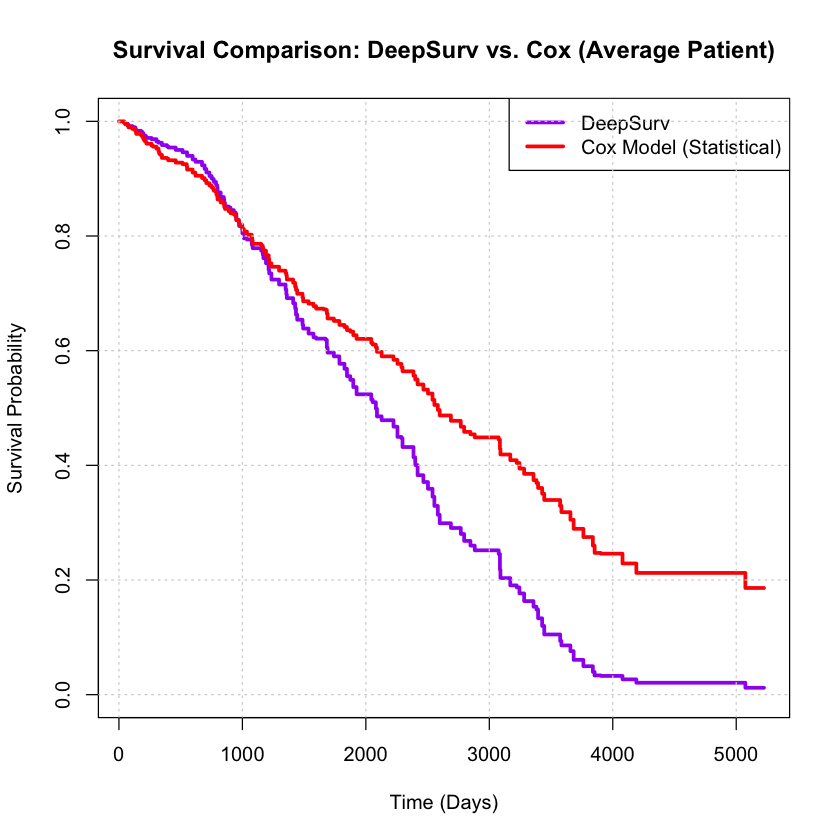

In [49]:
avg_patient_matrix <- matrix(colMeans(train_df[, 1:(ncol(train_df)-2)]), nrow=1)
colnames(avg_patient_matrix) <- colnames(train_df)[1:(ncol(train_df)-2)]
deep_probs <- predict(fit_deep, new_data = avg_patient_matrix, type = "survival")
plot_times <- as.numeric(colnames(deep_probs))
plot_deep_y <- as.numeric(deep_probs[1, ])
if(any(is.na(plot_times))) plot_times <- sort(unique(train_df$futime))
cox_fit_avg <- survfit(M_f)
par(bg = "white")
plot(x = plot_times, 
     y = plot_deep_y,
     main = "Survival Comparison: DeepSurv vs. Cox (Average Patient)", 
     xlab = "Time (Days)", 
     ylab = "Survival Probability", 
     col = "purple", 
     lwd = 3, 
     type = "s",
     ylim = c(0, 1))

lines(cox_fit_avg, col = "red", lwd = 3, conf.int = FALSE)
legend("topright", 
       legend = c("DeepSurv", "Cox Model (Statistical)"),
       col = c("purple", "red"),
       lwd = 3,
       lty = 1)

grid()

I trained a DeepSurv neural network to capture complex, non-linear interactions between covariates.

**Performance**: The Deep Learning model achieved a superior C-index of 0.82 compared to the Cox model's 0.78.

**Visual Analysis**: The comparison plot reveals that while both models agree on the general trend, the DeepSurv model predicts a steeper decline in survival probability for the "average patient" between days 1,500 and 3,000, suggesting it captures risk factors during this intermediate period more aggressively than the linear Cox model.

**Conclusion**: While the standard Cox model provides interpretable coefficients (quantifying risk ratios), the Deep Learning approach demonstrated higher predictive accuracy, successfully capturing non-linear patterns in patient data that traditional linear models missed.